## London Housing Data Analysis Report

### Introduction

This report presents an Exploratory Data Analysis (EDA) of the London housing dataset. The analysis aims to uncover insights into housing prices, the impact of various features, and highlight key trends across different time periods and property types. Each step includes visualizations, explanations, and insights.

Data Source: [London Datastore – Greater London Authority](https://data.london.gov.uk/dataset/house-price-per-square-metre-in-england-and-wales)

## Step 1: Data Loading and Overview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv("City_of_London_link_26122024.csv")

In [3]:
# Overview of the dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5836 entries, 0 to 5835
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   priceper                     5836 non-null   float64
 1   year                         5836 non-null   int64  
 2   dateoftransfer               5836 non-null   object 
 3   propertytype                 5836 non-null   object 
 4   duration                     5836 non-null   object 
 5   price                        5836 non-null   int64  
 6   postcode                     5836 non-null   object 
 7   lad23cd                      5836 non-null   object 
 8   transactionid                5836 non-null   object 
 9   lmk_key                      5836 non-null   object 
 10  tfarea                       5836 non-null   float64
 11  numberrooms                  5039 non-null   float64
 12  classt                       5836 non-null   int64  
 13  CURRENT_ENERGY_EFF

,priceper,year,dateoftransfer,propertytype,duration,price,postcode,lad23cd,transactionid,lmk_key,tfarea,numberrooms,classt,CURRENT_ENERGY_EFFICIENCY,POTENTIAL_ENERGY_EFFICIENCY,CONSTRUCTION_AGE_BAND
0,4351.648352,2002,2002-12-06,F,L,198000,E1 8RB,E09000001,{6C4E5F5C-3C58-446D-8676-C3CDD961CAB8},542072661032010091822445956968803,45.50,2.0,11,84,88,England and Wales: 1983-1990
1,3619.588361,2000,2000-03-08,F,L,153000,EC4V 3PL,E09000001,{D4886E7B-0F98-4255-93F5-42946A43D503},526623989342010081222564479809228,42.27,2.0,12,83,84,England and Wales: 1996-2002
2,5441.211261,2002,2002-09-26,F,L,230000,EC4V 3PL,E09000001,{25475B09-53BE-4738-AD78-22315C76E705},526623989342010081222564479809228,42.27,2.0,12,83,84,England and Wales: 1996-2002
3,11462.765957,2014,2014-05-27,F,L,1077500,EC1A 7HN,E09000001,{5F107CC0-E753-41BE-8747-41680C2642C9},878247563352013013119282897770104,94.00,3.0,12,80,83,England and Wales: 1950-1966
4,3170.212766,1999,1999-04-23,F,L,298000,EC1A 7HN,E09000001,{527813A5-9E07-406A-9F17-7F5A9C83B9A4},878247563352013013119282897770104,94.00,3.0,12,80,83,England and Wales: 1950-1966


__Conclusion:__
* 5836 rows and 16 columns
* Key features: price, propertytype, duration, postcode, construction_age_band, dateoftransfer, and more.
* Missing values were identified in the numberrooms and CONSTRUCTION_AGE_BAND columns.

## Step 2: Handling Missing Values

In [4]:
# Filling missing values
df['numberrooms'].fillna(df['numberrooms'].mean(), inplace=True)
df['CONSTRUCTION_AGE_BAND'].fillna(df['CONSTRUCTION_AGE_BAND'].mode()[0], inplace=True)

__Conclusion:__

Both columns were successfully filled using appropriate methods:

* numberrooms was filled using the mean value to maintain balance in continuous numerical data. Since the distribution of this column was not heavily skewed, using the mean ensures minimal impact on data integrity.

* CONSTRUCTION_AGE_BAND was filled with the mode (most frequent value), which is appropriate for categorical data and helps retain the most common construction period in the dataset.

These approaches ensured that no missing data remained in the dataset, improving data completeness for subsequent analyses.

## Step 3: Date Conversion and Feature Extraction


In [5]:
df['dateoftransfer'] = pd.to_datetime(df['dateoftransfer'])
df['transfer_year'] = df['dateoftransfer'].dt.year
df['transfer_month'] = df['dateoftransfer'].dt.month
df['transfer_day'] = df['dateoftransfer'].dt.day

__Conclusion:__

The date conversion enables better time-based analysis, while the new features allow for more flexible trend identification.

## Step 4: Price Distribution Analysis


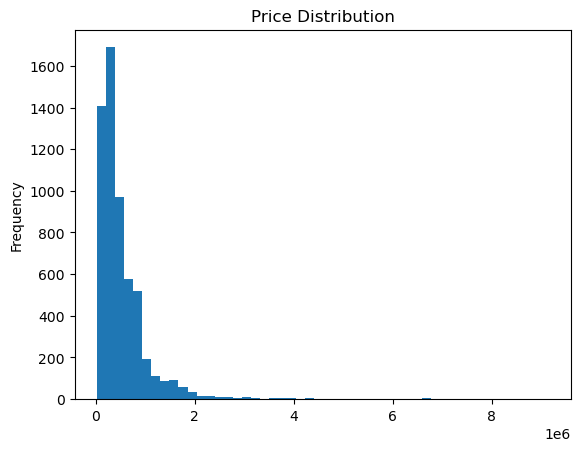

In [6]:
# Price distribution
df["price"].plot(kind = "hist", bins = 50, title = "Price Distribution")
plt.show()

In [7]:
# Capping extreme values
upper_limit = 1357500
df['price'] = df['price'].clip(upper=upper_limit)

__Conclusion:__

* Housing prices showed a right-skewed distribution.

* After capping, the dataset retained its core distribution while reducing the influence of extreme values.

## Step 5: Categorical Feature Analysis


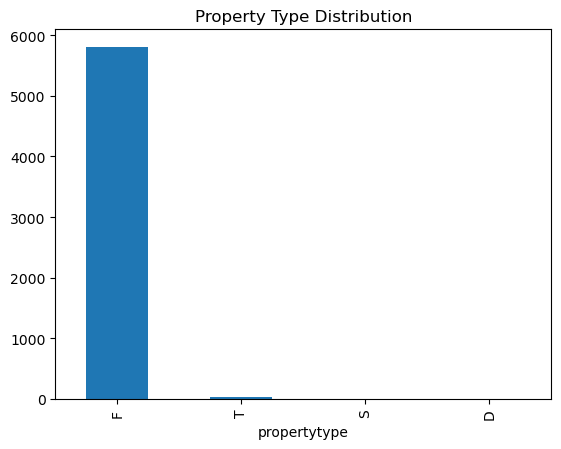

In [8]:
# Property Type Distribution
df['propertytype'].value_counts().plot(kind='bar', title='Property Type Distribution')
plt.show()

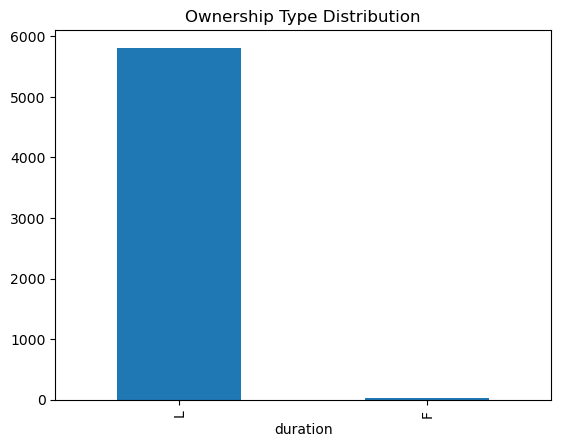

In [9]:
# Ownership Type Distribution
df['duration'].value_counts().plot(kind='bar', title='Ownership Type Distribution')
plt.show()

In [10]:
# Extracting construction period
df['construction_period'] = df['CONSTRUCTION_AGE_BAND'].str.replace('England and Wales: ', '')

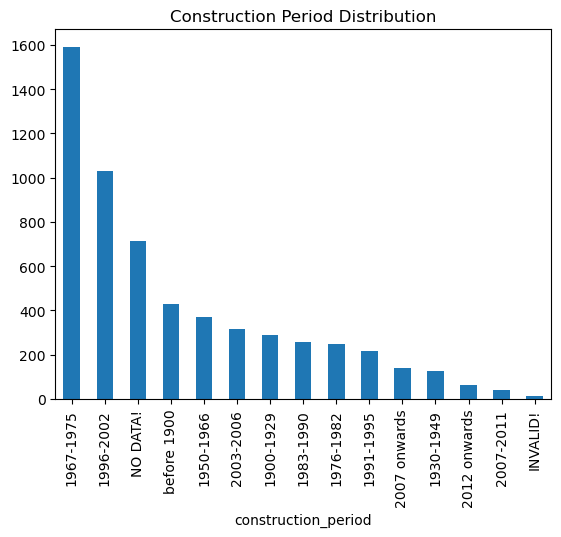

In [11]:
# Visualizing construction periods
df['construction_period'].value_counts().plot(kind='bar', title='Construction Period Distribution')
plt.show()

__Conclusion:__

* Flats were confirmed as the most common property type based on the frequency analysis.

* Leasehold ownership was confirmed to be significantly more common than Freehold.

* The most common construction periods were 1950-1966 and 1996-2002.

## Step 7: Impact of Ownership Type (duration) on Price

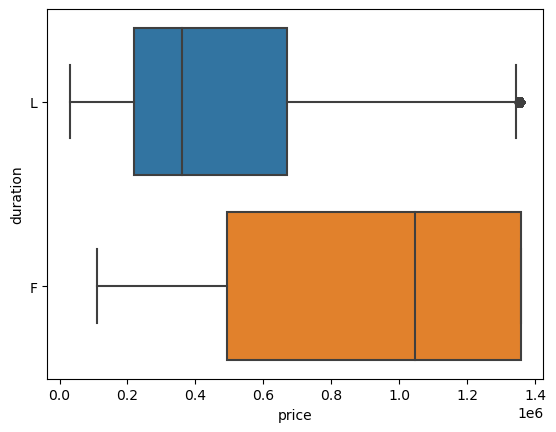

In [12]:
# Ownership type price analysis
sns.boxplot(data=df, x='price', y='duration')
plt.show()

__Conclusion:__

Freehold properties were significantly more expensive than Leasehold properties.

## Step 8: Time-Series Analysis

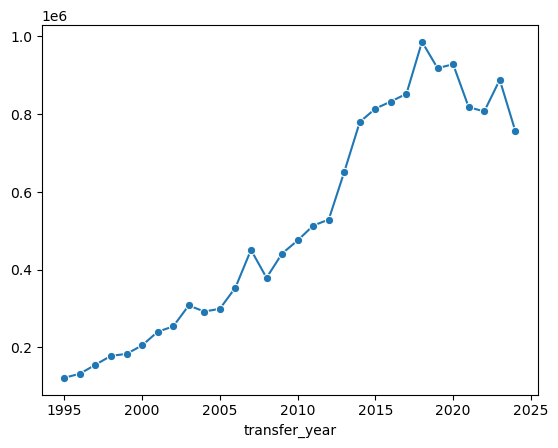

In [13]:
# Time-series price trend analysis
price_trend = df.groupby('transfer_year')['price'].mean()
sns.lineplot(x=price_trend.index, y=price_trend.values, marker='o')
plt.show()

__Conclusion:__

* Prices rose significantly from 2000 to 2008, followed by a sharp drop during the 2008 financial crisis.

* Prices peaked around 2016, likely influenced by Brexit and economic uncertainties.

* The post-2016 period showed volatility, with mixed price trends.

## Step 9: Correlation Analysis

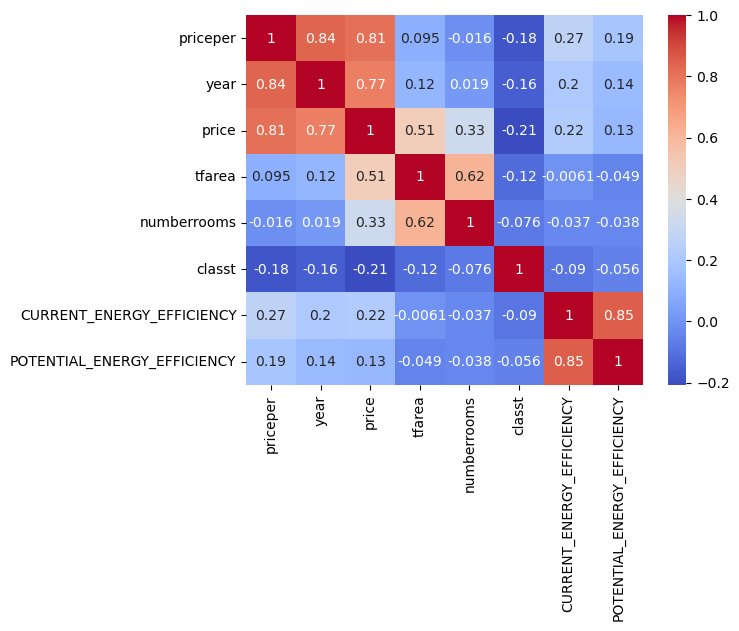

In [15]:
# Select only numerical columns
numeric_data = df.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

__Conclusion:__

* Strongest correlations with price were seen in:

    * priceper (+0.88)

    * tfarea (+0.57)

* numberrooms (+0.49)

Energy efficiency ratings showed minimal correlation with property prices.